In [1]:
#Importing warning library to avoid any warnings
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset excel file using pandas.
df=pd.read_csv('Rating price pridiction.csv') 

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 50000
No. of Columns : 3


,Unnamed: 0,Product_Review,Ratings
0,0,It has great sound quality and bass but after ...,1.0
1,1,"[BIG UPDATE]IT BROKE ALONG THE RIGHT HINGE, I ...",2.0
2,2,This is a premium quality product from boAt-Li...,5.0
3,3,The boAt Rockerz line is boAt's super cheap li...,1.0
4,4,These are super comfortable and premium lookin...,5.0


In [4]:
# Dropping unnecssary index column Unnamed:0 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info() #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Review  49920 non-null  object 
 1   Ratings         50000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 781.4+ KB


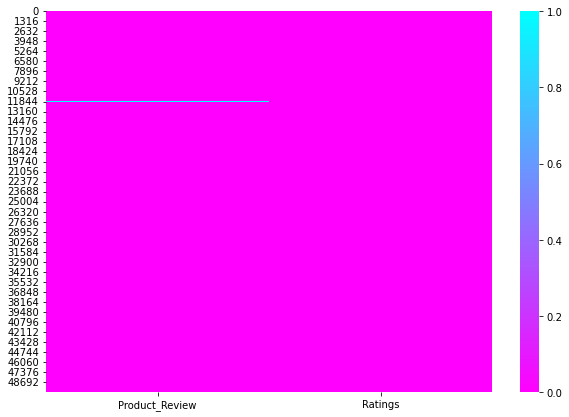

Product_Review    80
Ratings            0
dtype: int64

In [6]:
#Data Integrity Check
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()
df.isnull().sum()

In [7]:
# Replacing missing data with 'Review Not Available' using pandas fillna()
df['Product_Review'].fillna('Review Not Available',inplace=True)

In [8]:
df.isnull().sum().any()  #Checking after filling them

False

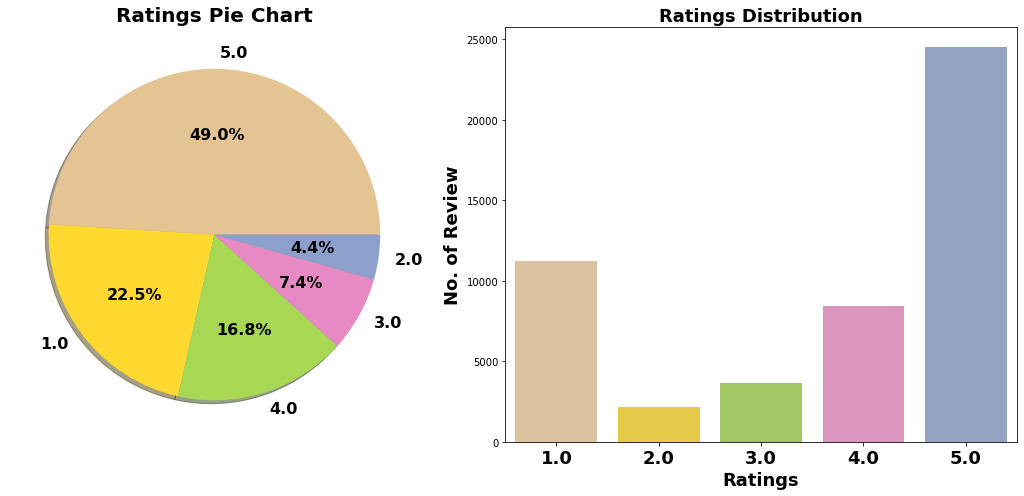

Value Counts of Rating:


5.0    24506
1.0    11232
4.0     8406
3.0     3680
2.0     2176
Name: Ratings, dtype: int64

In [9]:
#Exploration of Target Variable Ratings
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Ratings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Ratings',data=df,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
df['Ratings'].value_counts()


In [10]:
# Average Rating given by user
print("Average rating given by users is " + str(df['Ratings'].mean()))

Average rating given by users is 3.65556


# Text Mining

In [11]:
!pip install wordcloud

In [12]:
#Importing required libraries
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

In [13]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [14]:
#Calling the class
clean_text(df, 'Product_Review')
df['Product_Review'].tail(3)

49997    great product works really fine usually numbr ...
49998    service good would say keep good work goin fli...
49999    buy need bigger coverage buy repeater router c...
Name: Product_Review, dtype: object

In [15]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Review'] = df['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,Product_Review,Ratings
0,"[great, sound, quality, bass, numbr, months, u...",1.0
1,"[big, update, broke, along, right, hinge, wear...",2.0
2,"[premium, quality, product, boat, lifestyle, p...",5.0
3,"[boat, rockerz, line, boat, super, cheap, line...",1.0
4,"[super, comfortable, premium, looking, headpho...",5.0


In [16]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [17]:
#Processing review with above Function
processed_review = []

for doc in df.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

50000


[['great',
  'sound',
  'qualiti',
  'bass',
  'numbr',
  'month',
  'use',
  'get',
  'break',
  'without',
  'fall',
  'jerk',
  'wear',
  'normal',
  'get',
  'break',
  'one',
  'side',
  'call',
  'costum',
  'care',
  'servic',
  'repli',
  'come',
  'also',
  'file',
  'complaint',
  'boat',
  'offici',
  'websit',
  'warranti',
  'claim',
  'respond',
  'come',
  'servic',
  'center',
  'approach',
  'claim',
  'numbr',
  'wast'],
 ['big',
  'updat',
  'break',
  'along',
  'right',
  'hing',
  'wear',
  'normal',
  'split',
  'open',
  'one',
  'side',
  'extend',
  'weak',
  'pic',
  'inscud',
  'boat',
  'numbr',
  'break',
  'centr',
  'need',
  'concentr',
  'less',
  'celebr',
  'endors',
  'use',
  'profit',
  'materi',
  'qualiti',
  'control',
  'still',
  'work',
  'tap',
  'metal',
  'sheet',
  'still',
  'give',
  'numbr',
  'star',
  'sound',
  'origin',
  'review',
  'own',
  'boat',
  'product',
  'rockerz',
  'numbr',
  'earphon',
  'best',
  'experi',
  'produc

In [18]:
df['clean_review']=processed_review  #Assigning this to the dataframe
df.head()

,Product_Review,Ratings,clean_review
0,"[great, sound, quality, bass, numbr, months, u...",1.0,"[great, sound, qualiti, bass, numbr, month, us..."
1,"[big, update, broke, along, right, hinge, wear...",2.0,"[big, updat, break, along, right, hing, wear, ..."
2,"[premium, quality, product, boat, lifestyle, p...",5.0,"[premium, qualiti, product, boat, lifestyl, pr..."
3,"[boat, rockerz, line, boat, super, cheap, line...",1.0,"[boat, rockerz, line, boat, super, cheap, line..."
4,"[super, comfortable, premium, looking, headpho...",5.0,"[super, comfort, premium, look, headphon, beau..."


In [19]:
df['Product_Review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))
df.head()

,Product_Review,Ratings,clean_review
0,great sound qualiti bass numbr month use get b...,1.0,"[great, sound, qualiti, bass, numbr, month, us..."
1,big updat break along right hing wear normal s...,2.0,"[big, updat, break, along, right, hing, wear, ..."
2,premium qualiti product boat lifestyl professi...,5.0,"[premium, qualiti, product, boat, lifestyl, pr..."
3,boat rockerz line boat super cheap lineup budg...,1.0,"[boat, rockerz, line, boat, super, cheap, line..."
4,super comfort premium look headphon beauti des...,5.0,"[super, comfort, premium, look, headphon, beau..."


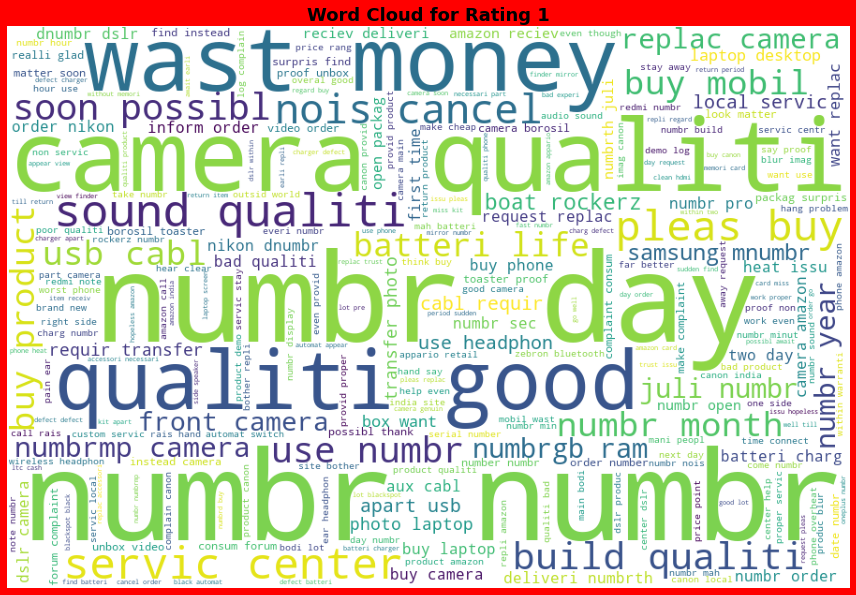

In [20]:
#Getting sense of words in Rating 1
one = df['Product_Review'][df['Ratings']==1.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

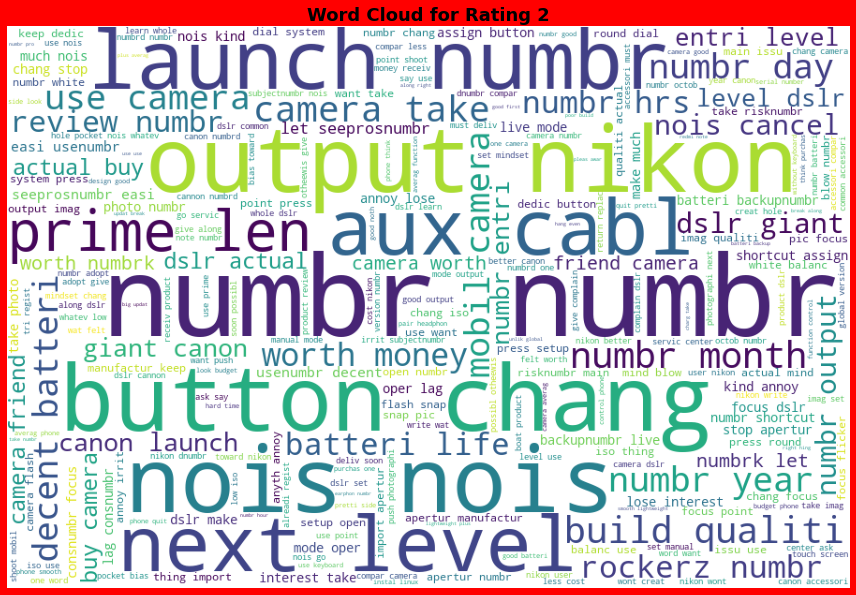

In [21]:
#Getting sense of words in Rating 2
one = df['Product_Review'][df['Ratings']==2.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 2',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

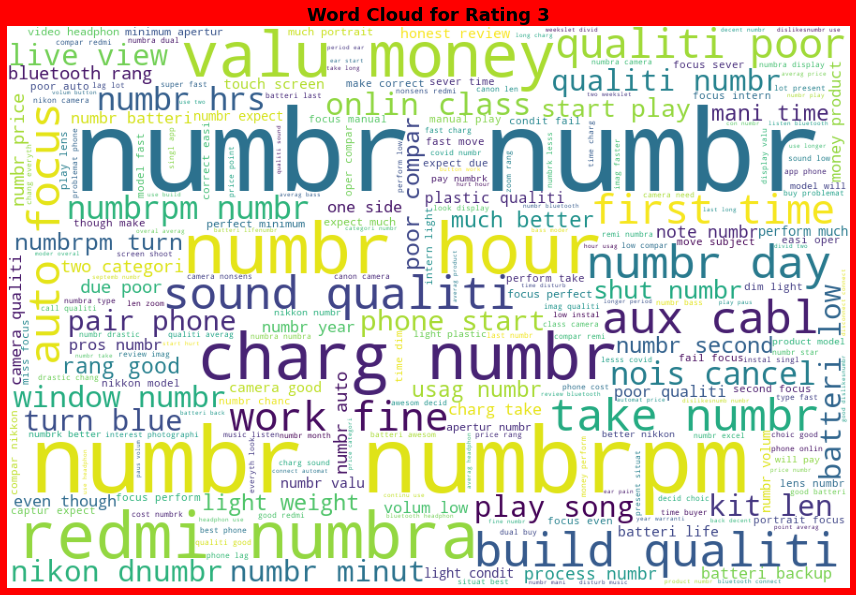

In [22]:
#Getting sense of words in Rating 3
one = df['Product_Review'][df['Ratings']==3.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

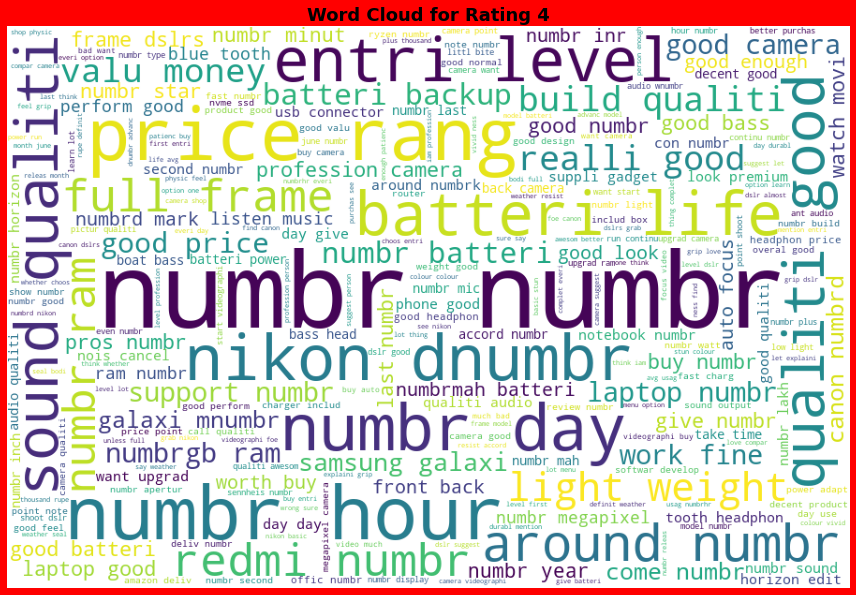

In [23]:
#Getting sense of words in Rating 4
one = df['Product_Review'][df['Ratings']==4.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

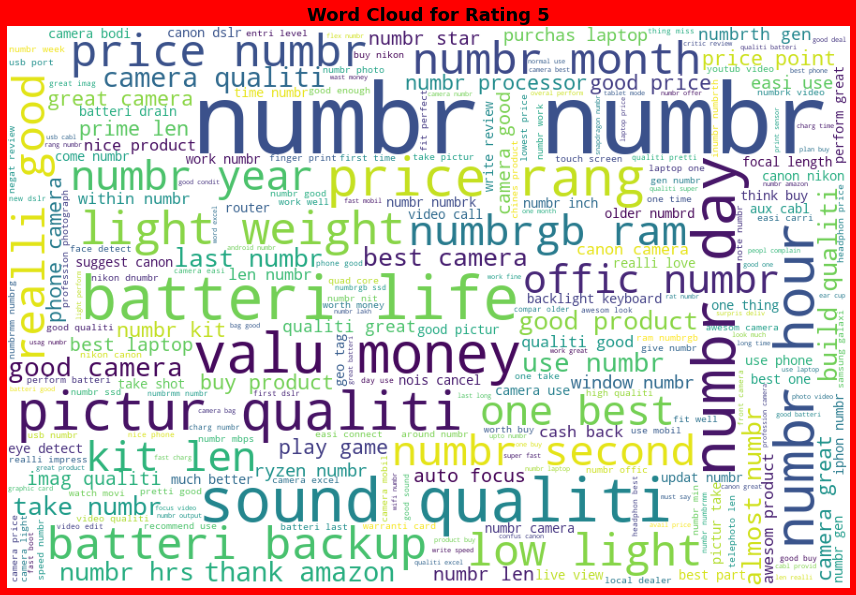

In [24]:
# Getting sense of words in Rating 5
one = df['Product_Review'][df['Ratings']==5.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

In [25]:
# Converting text into numeric using TfidfVectorizer
tf = TfidfVectorizer()
features = tf.fit_transform(df['Product_Review'])
X=features
Y=df[['Ratings']]

In [26]:
X.shape

(50000, 5828)

In [27]:
Y.shape

(50000, 1)

# Machine Learning Model Building


In [28]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (35000, 5828)
Training target vector size: (35000, 1)
Test feature matrix size: (15000, 5828)
Test target vector size: (15000, 1)


# Finding best Random state

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9071333333333333 on Random_state 71


In [31]:
#Logistics Regression
# Creating train_test_split using best random_state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=71, test_size=.3)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=71, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9071333333333333


Confusion matrix of Logistics Regression : 
 [[3330    7    3    9   29]
 [  35  573    0    2    7]
 [  42    0  820   13  232]
 [  36    3    5 1712  713]
 [ 121    5   16  115 7172]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

         1.0       0.93      0.99      0.96      3378
         2.0       0.97      0.93      0.95       617
         3.0       0.97      0.74      0.84      1107
         4.0       0.92      0.69      0.79      2469
         5.0       0.88      0.97      0.92      7429

    accuracy                           0.91     15000
   macro avg       0.94      0.86      0.89     15000
weighted avg       0.91      0.91      0.90     15000



In [33]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.5435 0.5184 0.6062 0.6375 0.5917]
Mean CV Score : 0.57946
Std deviation : 0.04302309147423043


In [34]:
#Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8978


Confusion matrix of Decision Tree Classifier : 
 [[3338    7    3    9   21]
 [  35  573    0    2    7]
 [  39    1  828   38  201]
 [  41    7   21 1813  587]
 [ 125    7   93  289 6915]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

         1.0       0.93      0.99      0.96      3378
         2.0       0.96      0.93      0.95       617
         3.0       0.88      0.75      0.81      1107
         4.0       0.84      0.73      0.78      2469
         5.0       0.89      0.93      0.91      7429

    accuracy                           0.90     15000
   macro avg       0.90      0.87      0.88     15000
weighted avg       0.90      0.90      0.90     15000



In [35]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.4437 0.4761 0.6108 0.54   0.5964]
Mean CV Score : 0.5334
Std deviation : 0.06531875687733196


In [36]:
#Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9128


Confusion matrix of Random Forest Classifier : 
 [[3338    7    3    9   21]
 [  35  573    0    2    7]
 [  36    0  821   11  239]
 [  28    3    7 1745  686]
 [  91    4   19  100 7215]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

         1.0       0.95      0.99      0.97      3378
         2.0       0.98      0.93      0.95       617
         3.0       0.97      0.74      0.84      1107
         4.0       0.93      0.71      0.80      2469
         5.0       0.88      0.97      0.93      7429

    accuracy                           0.91     15000
   macro avg       0.94      0.87      0.90     15000
weighted avg       0.92      0.91      0.91     15000



In [37]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.5537 0.4886 0.5744 0.6126 0.582 ]
Mean CV Score : 0.56226
Std deviation : 0.04140104346511089


In [38]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.5932


Confusion matrix of AdaBoost Classifier : 
 [[1433    3   87   65 1790]
 [ 211  201    0   19  186]
 [  63    0  246   39  759]
 [ 133    3    7   41 2285]
 [ 299    5   62   86 6977]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

         1.0       0.67      0.42      0.52      3378
         2.0       0.95      0.33      0.48       617
         3.0       0.61      0.22      0.33      1107
         4.0       0.16      0.02      0.03      2469
         5.0       0.58      0.94      0.72      7429

    accuracy                           0.59     15000
   macro avg       0.60      0.39      0.42     15000
weighted avg       0.55      0.59      0.52     15000



In [39]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.4397 0.4939 0.5635 0.5687 0.5499]
Mean CV Score : 0.52314
Std deviation : 0.04947312805958403


We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score

In [ ]:
#Saving model
import joblib
joblib.dump(Final_mod,'Review_Rating_Prediction.pkl')